In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set_theme()
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
CCBL = pd.read_csv('credit_card_balance.csv')

In [3]:
CCBL

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.97,135000,0.00,877.50,0.00,877.50,"1,700.33",...,0.00,0.00,0.00,1,0.00,1.00,35.00,Active,0,0
1,2582071,363914,-1,"63,975.56",45000,"2,250.00","2,250.00",0.00,0.00,"2,250.00",...,"64,875.56","64,875.56",1.00,1,0.00,0.00,69.00,Active,0,0
2,1740877,371185,-7,"31,815.22",450000,0.00,0.00,0.00,0.00,"2,250.00",...,"31,460.08","31,460.08",0.00,0,0.00,0.00,30.00,Active,0,0
3,1389973,337855,-4,"236,572.11",225000,"2,250.00","2,250.00",0.00,0.00,"11,795.76",...,"233,048.97","233,048.97",1.00,1,0.00,0.00,10.00,Active,0,0
4,1891521,126868,-1,"453,919.46",450000,0.00,"11,547.00",0.00,"11,547.00","22,924.89",...,"453,919.46","453,919.46",0.00,1,0.00,1.00,101.00,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.00,45000,NaN,0.00,NaN,NaN,0.00,...,0.00,0.00,NaN,0,NaN,NaN,0.00,Active,0,0
3840308,1714892,347207,-9,0.00,45000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0,0.00,0.00,23.00,Active,0,0
3840309,1302323,215757,-9,"275,784.97",585000,"270,000.00","270,000.00",0.00,0.00,"2,250.00",...,"273,093.97","273,093.97",2.00,2,0.00,0.00,18.00,Active,0,0
3840310,1624872,430337,-10,0.00,450000,NaN,0.00,NaN,NaN,0.00,...,0.00,0.00,NaN,0,NaN,NaN,0.00,Active,0,0


SK_ID_PREV ,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)",hashed

SK_ID_CURR,ID of loan in our sample,hashed

MONTHS_BALANCE,Month of balance relative to application date (-1 means the freshest balance date),time only relative to the application

AMT_BALANCE,Balance during the month of previous credit,

AMT_CREDIT_LIMIT_ACTUAL,Credit card limit during the month of the previous credit,

AMT_DRAWINGS_ATM_CURRENT,Amount drawing at ATM during the month of the previous credit,

AMT_DRAWINGS_CURRENT,Amount drawing during the month of the previous credit,

AMT_DRAWINGS_OTHER_CURRENT,Amount of other drawings during the month of the previous credit,

AMT_DRAWINGS_POS_CURRENT,Amount drawing or buying goods during the month of the previous credit,

AMT_INST_MIN_REGULARITY,Minimal installment for this month of the previous credit,

AMT_PAYMENT_CURRENT,How much did the client pay during the month on the previous credit,

AMT_PAYMENT_TOTAL_CURRENT,How much did the client pay during the month in total on the previous credit,

AMT_RECEIVABLE_PRINCIPAL,Amount receivable for principal on the previous credit,

AMT_RECIVABLE,Amount receivable on the previous credit,

AMT_TOTAL_RECEIVABLE,Total amount receivable on the previous credit,

CNT_DRAWINGS_ATM_CURRENT,Number of drawings at ATM during this month on the previous credit,

CNT_DRAWINGS_CURRENT,Number of drawings during this month on the previous credit,

CNT_DRAWINGS_OTHER_CURRENT,Number of other drawings during this month on the previous credit,

CNT_DRAWINGS_POS_CURRENT,Number of drawings for goods during this month on the previous credit,

CNT_INSTALMENT_MATURE_CUM,Number of paid installments on the previous credit,

NAME_CONTRACT_STATUS,"Contract status (active signed,...) on the previous credit",

SK_DPD,DPD (Days past due) during the month on the previous credit,

SK_DPD_DEF,DPD (Days past due) during the month with tolerance (debts with low loan amounts are ignored) of the previous credit,


In [4]:
CCBL.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.97,135000,0.00,877.50,0.00,877.50,"1,700.33",...,0.00,0.00,0.00,1,0.00,1.00,35.00,Active,0,0
1,2582071,363914,-1,"63,975.56",45000,"2,250.00","2,250.00",0.00,0.00,"2,250.00",...,"64,875.56","64,875.56",1.00,1,0.00,0.00,69.00,Active,0,0
2,1740877,371185,-7,"31,815.22",450000,0.00,0.00,0.00,0.00,"2,250.00",...,"31,460.08","31,460.08",0.00,0,0.00,0.00,30.00,Active,0,0
3,1389973,337855,-4,"236,572.11",225000,"2,250.00","2,250.00",0.00,0.00,"11,795.76",...,"233,048.97","233,048.97",1.00,1,0.00,0.00,10.00,Active,0,0
4,1891521,126868,-1,"453,919.46",450000,0.00,"11,547.00",0.00,"11,547.00","22,924.89",...,"453,919.46","453,919.46",0.00,1,0.00,1.00,101.00,Active,0,0


In [35]:
CCBL.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

In [37]:
CCBL.duplicated().sum()

0

In [39]:
CCBL.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

<AxesSubplot:xlabel='Percentage', ylabel='Feature'>

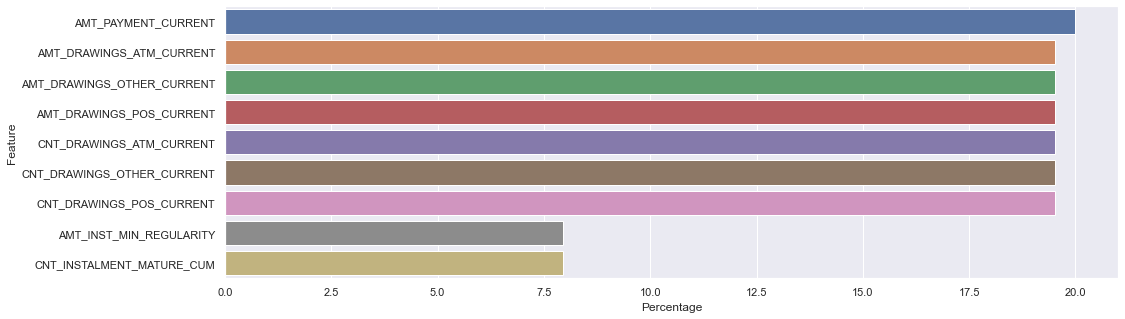

In [23]:
plt.figure(figsize=(16,5))
sns.barplot(x=  null_df["Percentage"] , y= null_df["Feature"] )

In [5]:
CCBL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [41]:
CCBL.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,"3,840,312.00","1,904,503.59","536,469.47","1,000,018.00","1,434,385.00","1,897,122.00","2,369,327.75","2,843,496.00"
SK_ID_CURR,"3,840,312.00","278,324.21","102,704.48","100,006.00","189,517.00","278,396.00","367,580.00","456,250.00"
MONTHS_BALANCE,"3,840,312.00",-34.52,26.67,-96.00,-55.00,-28.00,-11.00,-1.00
AMT_BALANCE,"3,840,312.00","58,300.16","106,307.03","-420,250.18",0.00,0.00,"89,046.69","1,505,902.19"
AMT_CREDIT_LIMIT_ACTUAL,"3,840,312.00","153,807.96","165,145.70",0.00,"45,000.00","112,500.00","180,000.00","1,350,000.00"
AMT_DRAWINGS_ATM_CURRENT,"3,090,496.00","5,961.32","28,225.69","-6,827.31",0.00,0.00,0.00,"2,115,000.00"
AMT_DRAWINGS_CURRENT,"3,840,312.00","7,433.39","33,846.08","-6,211.62",0.00,0.00,0.00,"2,287,098.31"
AMT_DRAWINGS_OTHER_CURRENT,"3,090,496.00",288.17,"8,201.99",0.00,0.00,0.00,0.00,"1,529,847.00"
AMT_DRAWINGS_POS_CURRENT,"3,090,496.00","2,968.80","20,796.89",0.00,0.00,0.00,0.00,"2,239,274.16"
AMT_INST_MIN_REGULARITY,"3,535,076.00","3,540.20","5,600.15",0.00,0.00,0.00,"6,633.91","202,882.01"


<AxesSubplot:>

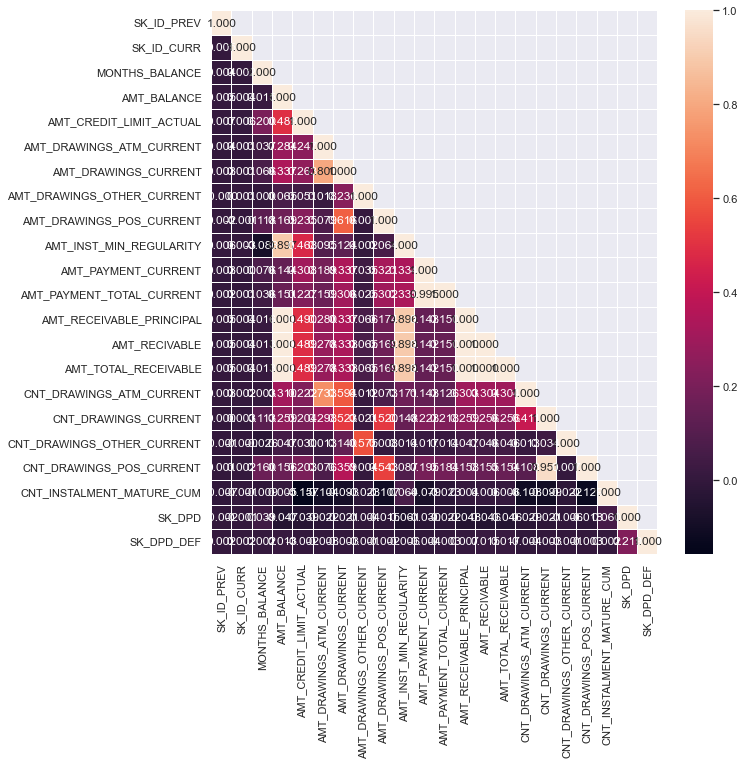

In [9]:
numeric_df = CCBL._get_numeric_data()
numeric_df_corr = numeric_df.corr()
numeric_df_corr

plt.figure(figsize=(10,10))
mask = np.zeros_like(numeric_df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False
sns.heatmap(numeric_df_corr,mask= mask, annot= True, fmt=".3f", linewidth=.5)

In [10]:
def draw_distribution(x, title,c):
    fig, ax = plt.subplots(2,1,figsize=(20,10))

    sns.distplot(x,ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')

    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')

    fig.suptitle(title, fontsize=20)
    plt.tight_layout()
    plt.show()

c:\users\lehuyphong\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lehuyphong\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


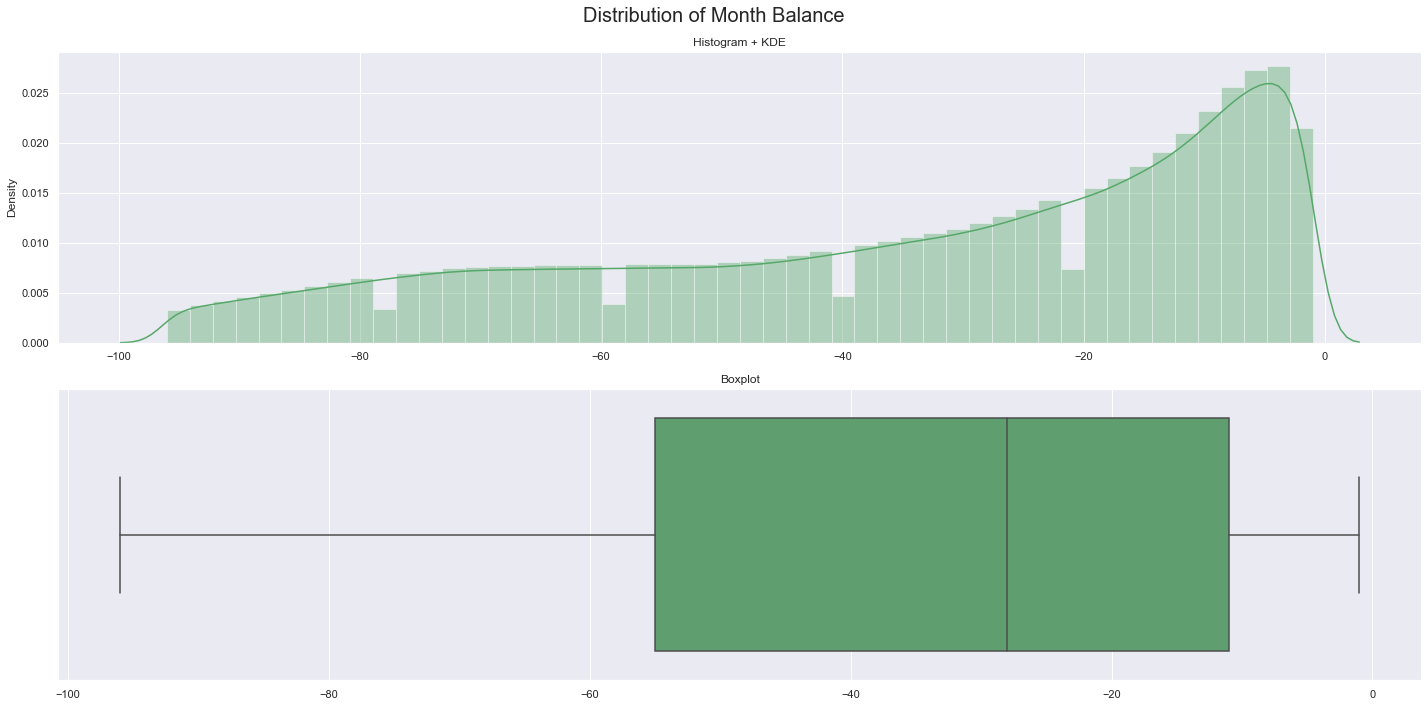

In [16]:
draw_distribution(CCBL['MONTHS_BALANCE'],'Distribution of Month Balance',"g")

c:\users\lehuyphong\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lehuyphong\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


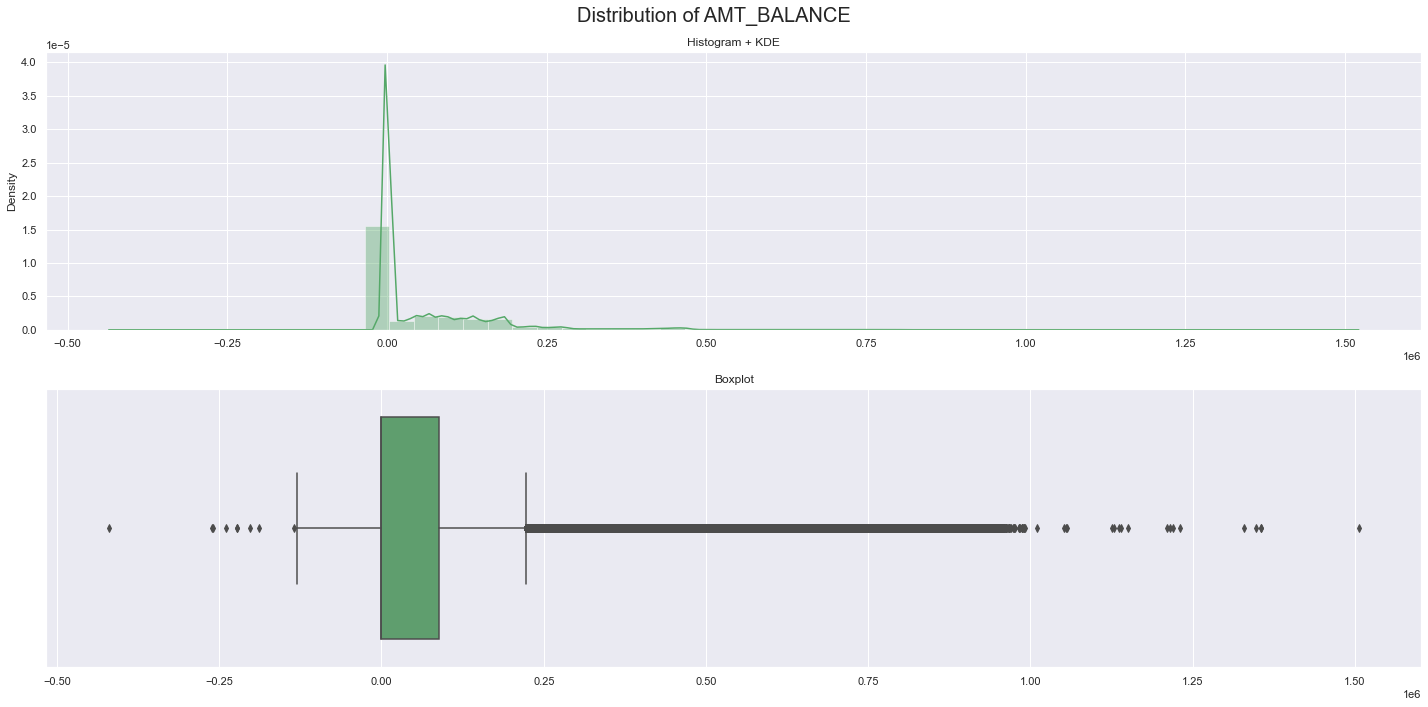

In [17]:
draw_distribution(CCBL['AMT_BALANCE'],'Distribution of AMT_BALANCE',"g")

c:\users\lehuyphong\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lehuyphong\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


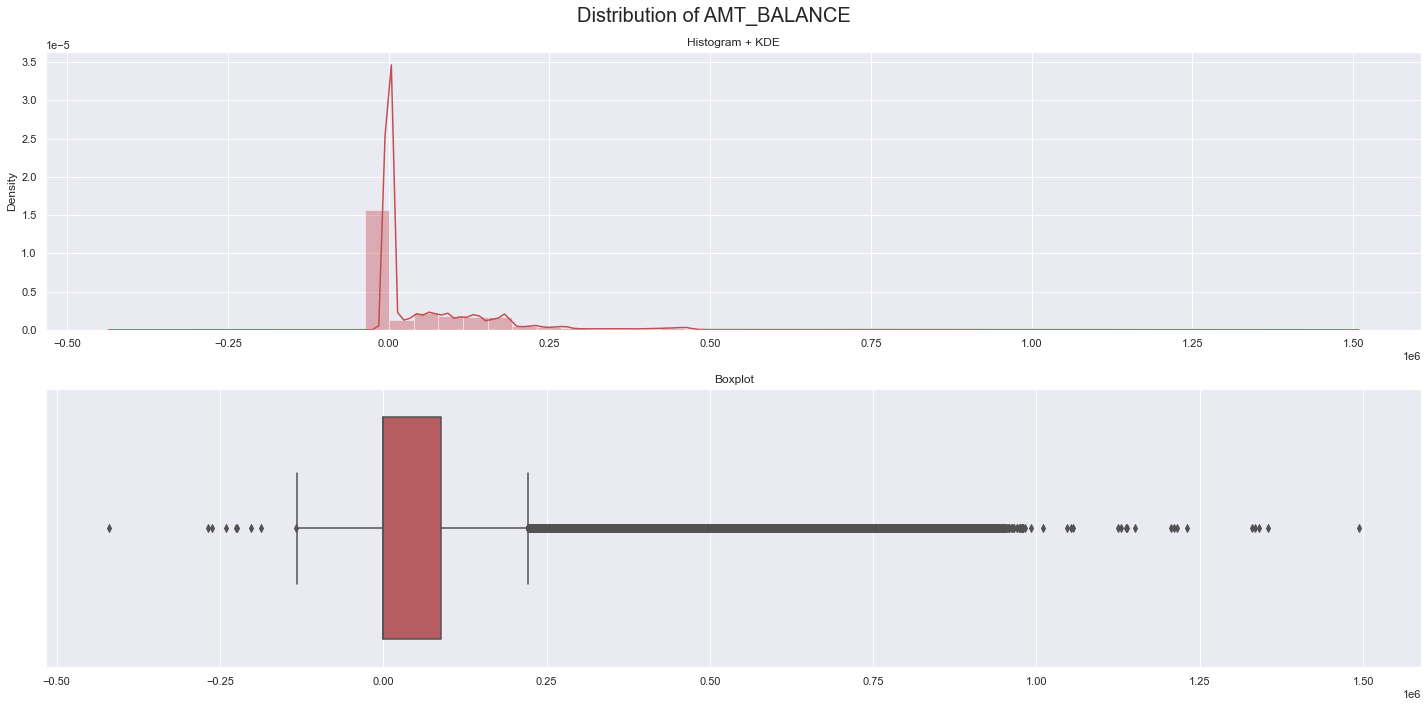

In [19]:
draw_distribution(CCBL['AMT_TOTAL_RECEIVABLE'],'Distribution of AMT_BALANCE',"r")

In [42]:
CCBL["NAME_CONTRACT_STATUS"].value_counts(normalize= True) * 100

Active          96.31
Completed        3.36
Signed           0.29
Demand           0.04
Sent proposal    0.01
Refused          0.00
Approved         0.00
Name: NAME_CONTRACT_STATUS, dtype: float64

In [43]:
## get the most recent record of this dataset
CCBL_filter = CCBL.sort_values(by=['MONTHS_BALANCE']).groupby(["SK_ID_CURR", "SK_ID_PREV"]).last().reset_index()
CCBL_filter

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,100006,1489396,-1,0.00,270000,NaN,0.00,NaN,NaN,0.00,...,0.00,0.00,NaN,0,NaN,NaN,0.00,Active,0,0
1,100011,1843384,-2,0.00,90000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0,0.00,0.00,33.00,Active,0,0
2,100013,2038692,-1,0.00,45000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0,0.00,0.00,22.00,Active,0,0
3,100021,2594025,-2,0.00,675000,NaN,0.00,NaN,NaN,0.00,...,0.00,0.00,NaN,0,NaN,NaN,0.00,Completed,0,0
4,100023,1499902,-4,0.00,225000,NaN,0.00,NaN,NaN,0.00,...,0.00,0.00,NaN,0,NaN,NaN,0.00,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104302,456244,2181926,-1,0.00,0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0,0.00,0.00,17.00,Completed,0,0
104303,456246,1079732,-2,62.69,135000,0.00,"1,052.55",0.00,"1,052.55",130.50,...,62.19,62.19,0.00,1,0.00,1.00,7.00,Active,0,0
104304,456247,1595171,-2,0.00,0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0,0.00,0.00,32.00,Active,0,0
104305,456248,2743495,-2,0.00,900000,NaN,0.00,NaN,NaN,0.00,...,0.00,0.00,NaN,0,NaN,NaN,0.00,Active,0,0


In [58]:
Train_df = pd.read_csv("application_train.csv")
Train_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,"202,500.00","406,597.50","24,700.50",...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,"270,000.00","1,293,502.50","35,698.50",...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,"67,500.00","135,000.00","6,750.00",...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
3,100006,0,Cash loans,F,N,Y,0,"135,000.00","312,682.50","29,686.50",...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,"121,500.00","513,000.00","21,865.50",...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,"157,500.00","254,700.00","27,558.00",...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,"72,000.00","269,550.00","12,001.50",...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,"153,000.00","677,664.00","29,979.00",...,0,0,0,0,1.00,0.00,0.00,1.00,0.00,1.00
307509,456254,1,Cash loans,F,N,Y,0,"171,000.00","370,107.00","20,205.00",...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00


In [74]:
CCBL_merged = pd.merge(Train_df[["SK_ID_CURR", "TARGET"]], CCBL, how= "left")
CCBL_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,100002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,"1,489,396.00",-2.00,0.00,"270,000.00",NaN,0.00,NaN,NaN,...,0.00,0.00,NaN,0.00,NaN,NaN,0.00,Active,0.00,0.00
4,100006,0,"1,489,396.00",-1.00,0.00,"270,000.00",NaN,0.00,NaN,NaN,...,0.00,0.00,NaN,0.00,NaN,NaN,0.00,Active,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3448566,456251,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3448567,456252,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3448568,456253,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3448569,456254,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
CCBL_merged.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,"3,448,571.00","278,284.69","102,650.87","100,002.00","189,342.50","278,234.00","367,490.00","456,255.00"
TARGET,"3,448,571.00",0.07,0.26,0.00,0.00,0.00,0.00,1.00
SK_ID_PREV,"3,227,965.00","1,903,894.10","536,741.49","1,000,018.00","1,431,613.00","1,896,076.00","2,369,259.00","2,843,493.00"
MONTHS_BALANCE,"3,227,965.00",-34.72,26.64,-96.00,-56.00,-28.00,-11.00,-1.00
AMT_BALANCE,"3,227,965.00","59,073.32","106,613.65","-420,250.18",0.00,0.00,"90,405.54","1,354,829.26"
AMT_CREDIT_LIMIT_ACTUAL,"3,227,965.00","152,953.57","163,709.20",0.00,"45,000.00","112,500.00","180,000.00","1,350,000.00"
AMT_DRAWINGS_ATM_CURRENT,"2,622,211.00","6,024.27","28,421.16","-6,827.31",0.00,0.00,0.00,"2,115,000.00"
AMT_DRAWINGS_CURRENT,"3,227,965.00","7,494.08","33,967.43","-6,211.62",0.00,0.00,0.00,"2,115,000.00"
AMT_DRAWINGS_OTHER_CURRENT,"2,622,211.00",298.49,"8,396.19",0.00,0.00,0.00,0.00,"1,529,847.00"
AMT_DRAWINGS_POS_CURRENT,"2,622,211.00","2,884.15","20,388.33",0.00,0.00,0.00,0.00,"2,060,030.16"


In [63]:
CCB_merged.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
SK_ID_PREV                    220606
MONTHS_BALANCE                220606
AMT_BALANCE                   220606
AMT_CREDIT_LIMIT_ACTUAL       220606
AMT_DRAWINGS_ATM_CURRENT      826360
AMT_DRAWINGS_CURRENT          220606
AMT_DRAWINGS_OTHER_CURRENT    826360
AMT_DRAWINGS_POS_CURRENT      826360
AMT_INST_MIN_REGULARITY       484990
AMT_PAYMENT_CURRENT           840699
AMT_PAYMENT_TOTAL_CURRENT     220606
AMT_RECEIVABLE_PRINCIPAL      220606
AMT_RECIVABLE                 220606
AMT_TOTAL_RECEIVABLE          220606
CNT_DRAWINGS_ATM_CURRENT      826360
CNT_DRAWINGS_CURRENT          220606
CNT_DRAWINGS_OTHER_CURRENT    826360
CNT_DRAWINGS_POS_CURRENT      826360
CNT_INSTALMENT_MATURE_CUM     484990
NAME_CONTRACT_STATUS          220606
SK_DPD                        220606
SK_DPD_DEF                    220606
dtype: int64

# Feature

Number of Loan per customer

In [75]:
CCB = CCBL[0:]
grp = CCB.groupby(by = ['SK_ID_CURR'])['SK_ID_PREV'].nunique().reset_index().rename(index = str, columns = {'SK_ID_PREV': 'NO_LOANS'})
CCB = CCB.merge(grp, on = ['SK_ID_CURR'], how = 'left')

In [76]:
grp

,SK_ID_CURR,NO_LOANS
0,100006,1
1,100011,1
2,100013,1
3,100021,1
4,100023,1
...,...,...
103553,456244,1
103554,456246,1
103555,456247,1
103556,456248,1


In [77]:
CCB

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,NO_LOANS
0,2562384,378907,-6,56.97,135000,0.00,877.50,0.00,877.50,"1,700.33",...,0.00,0.00,1,0.00,1.00,35.00,Active,0,0,1
1,2582071,363914,-1,"63,975.56",45000,"2,250.00","2,250.00",0.00,0.00,"2,250.00",...,"64,875.56",1.00,1,0.00,0.00,69.00,Active,0,0,1
2,1740877,371185,-7,"31,815.22",450000,0.00,0.00,0.00,0.00,"2,250.00",...,"31,460.08",0.00,0,0.00,0.00,30.00,Active,0,0,1
3,1389973,337855,-4,"236,572.11",225000,"2,250.00","2,250.00",0.00,0.00,"11,795.76",...,"233,048.97",1.00,1,0.00,0.00,10.00,Active,0,0,1
4,1891521,126868,-1,"453,919.46",450000,0.00,"11,547.00",0.00,"11,547.00","22,924.89",...,"453,919.46",0.00,1,0.00,1.00,101.00,Active,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.00,45000,NaN,0.00,NaN,NaN,0.00,...,0.00,NaN,0,NaN,NaN,0.00,Active,0,0,1
3840308,1714892,347207,-9,0.00,45000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,23.00,Active,0,0,1
3840309,1302323,215757,-9,"275,784.97",585000,"270,000.00","270,000.00",0.00,0.00,"2,250.00",...,"273,093.97",2.00,2,0.00,0.00,18.00,Active,0,0,1
3840310,1624872,430337,-10,0.00,450000,NaN,0.00,NaN,NaN,0.00,...,0.00,NaN,0,NaN,NaN,0.00,Active,0,0,1


RATE OF PAYBACK OF LOANS - NO OF INSTALMENTS PAID BY CUSTOMER PER LOAN

In [78]:
#No of Installments paid per Loan per Customer 

grp1 = CCB.groupby(by = ['SK_ID_CURR', 'SK_ID_PREV'])['CNT_INSTALMENT_MATURE_CUM'].max().reset_index().rename(index = str, columns = {'CNT_INSTALMENT_MATURE_CUM': 'NO_INSTALMENTS'})
grp2 = grp1.groupby(by = ['SK_ID_CURR'])['NO_INSTALMENTS'].sum().reset_index().rename(index = str, columns = {'NO_INSTALMENTS': 'TOTAL_INSTALMENTS'})
CCB1 = CCB.merge(grp2, on = ['SK_ID_CURR'], how = 'left')

In [79]:
grp2

,SK_ID_CURR,TOTAL_INSTALMENTS
0,100006,0.00
1,100011,33.00
2,100013,22.00
3,100021,0.00
4,100023,0.00
...,...,...
103553,456244,17.00
103554,456246,7.00
103555,456247,32.00
103556,456248,0.00


In [80]:
CCB1

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,NO_LOANS,TOTAL_INSTALMENTS
0,2562384,378907,-6,56.97,135000,0.00,877.50,0.00,877.50,"1,700.33",...,0.00,1,0.00,1.00,35.00,Active,0,0,1,39.00
1,2582071,363914,-1,"63,975.56",45000,"2,250.00","2,250.00",0.00,0.00,"2,250.00",...,1.00,1,0.00,0.00,69.00,Active,0,0,1,69.00
2,1740877,371185,-7,"31,815.22",450000,0.00,0.00,0.00,0.00,"2,250.00",...,0.00,0,0.00,0.00,30.00,Active,0,0,1,36.00
3,1389973,337855,-4,"236,572.11",225000,"2,250.00","2,250.00",0.00,0.00,"11,795.76",...,1.00,1,0.00,0.00,10.00,Active,0,0,1,13.00
4,1891521,126868,-1,"453,919.46",450000,0.00,"11,547.00",0.00,"11,547.00","22,924.89",...,0.00,1,0.00,1.00,101.00,Active,0,0,1,101.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.00,45000,NaN,0.00,NaN,NaN,0.00,...,NaN,0,NaN,NaN,0.00,Active,0,0,1,0.00
3840308,1714892,347207,-9,0.00,45000,0.00,0.00,0.00,0.00,0.00,...,0.00,0,0.00,0.00,23.00,Active,0,0,1,23.00
3840309,1302323,215757,-9,"275,784.97",585000,"270,000.00","270,000.00",0.00,0.00,"2,250.00",...,2.00,2,0.00,0.00,18.00,Active,0,0,1,26.00
3840310,1624872,430337,-10,0.00,450000,NaN,0.00,NaN,NaN,0.00,...,NaN,0,NaN,NaN,0.00,Active,0,0,1,0.00


In [81]:
# Average Number of installments paid per loan 
CCB1['INSTALLMENTS_PER_LOAN'] = (CCB1['TOTAL_INSTALMENTS']/CCB1['NO_LOANS']).astype('uint32')

In [82]:
CCB1

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,NO_LOANS,TOTAL_INSTALMENTS,INSTALLMENTS_PER_LOAN
0,2562384,378907,-6,56.97,135000,0.00,877.50,0.00,877.50,"1,700.33",...,1,0.00,1.00,35.00,Active,0,0,1,39.00,39
1,2582071,363914,-1,"63,975.56",45000,"2,250.00","2,250.00",0.00,0.00,"2,250.00",...,1,0.00,0.00,69.00,Active,0,0,1,69.00,69
2,1740877,371185,-7,"31,815.22",450000,0.00,0.00,0.00,0.00,"2,250.00",...,0,0.00,0.00,30.00,Active,0,0,1,36.00,36
3,1389973,337855,-4,"236,572.11",225000,"2,250.00","2,250.00",0.00,0.00,"11,795.76",...,1,0.00,0.00,10.00,Active,0,0,1,13.00,13
4,1891521,126868,-1,"453,919.46",450000,0.00,"11,547.00",0.00,"11,547.00","22,924.89",...,1,0.00,1.00,101.00,Active,0,0,1,101.00,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.00,45000,NaN,0.00,NaN,NaN,0.00,...,0,NaN,NaN,0.00,Active,0,0,1,0.00,0
3840308,1714892,347207,-9,0.00,45000,0.00,0.00,0.00,0.00,0.00,...,0,0.00,0.00,23.00,Active,0,0,1,23.00,23
3840309,1302323,215757,-9,"275,784.97",585000,"270,000.00","270,000.00",0.00,0.00,"2,250.00",...,2,0.00,0.00,18.00,Active,0,0,1,26.00,26
3840310,1624872,430337,-10,0.00,450000,NaN,0.00,NaN,NaN,0.00,...,0,NaN,NaN,0.00,Active,0,0,1,0.00,0


c:\users\lehuyphong\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

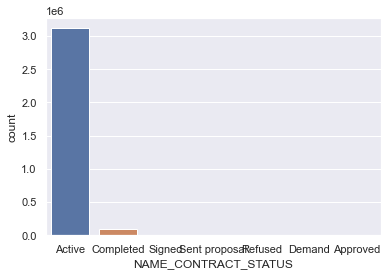

In [83]:
sns.countplot(CCBL_merged["NAME_CONTRACT_STATUS"])

In [84]:
agg_CCB_df = CCB.groupby('SK_ID_CURR')["MONTHS_BALANCE","AMT_BALANCE", "AMT_CREDIT_LIMIT_ACTUAL","SK_DPD", "SK_DPD_DEF"].agg( ['min', 'max', 'mean','std'])
agg_CCB_df

C:\Users\LEHUYP~1\AppData\Local\Temp/ipykernel_12856/1561076379.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_CCB_df = CCB.groupby('SK_ID_CURR')["MONTHS_BALANCE","AMT_BALANCE", "AMT_CREDIT_LIMIT_ACTUAL","SK_DPD", "SK_DPD_DEF"].agg( ['min', 'max', 'mean','std'])


MONTHS_BALANCE                  AMT_BALANCE                        \
                      min max   mean   std         min        max       mean   
SK_ID_CURR                                                                     
100006                 -6  -1  -3.50  1.87        0.00       0.00       0.00   
100011                -75  -2 -38.50 21.51        0.00 189,000.00  54,482.11   
100013                -96  -1 -48.50 27.86        0.00 161,420.22  18,159.92   
100021                -18  -2 -10.00  5.05        0.00       0.00       0.00   
100023                -11  -4  -7.50  2.45        0.00       0.00       0.00   
...                   ...  ..    ...   ...         ...        ...        ...   
456244                -41  -1 -21.00 11.98        0.00 453,627.67 131,834.73   
456246                 -9  -2  -5.50  2.45        0.00  43,490.11  13,136.73   
456247                -96  -2 -49.00 27.57        0.00 190,202.13  23,216.40   
456248                -24  -2 -13.00  6.78        0.00       0.00       0.00   
456250                -12  -1  -6.50  3.61  153,832.73 200,208.92 173,589.33   

                      AMT_CREDIT_LIMIT_ACTUAL                                \
                  std                     min     max       mean        std   
SK_ID_CURR                                                                    
100006           0.00                  270000  270000 270,000.00       0.00   
100011      68,127.24                   90000  180000 164,189.19  34,482.74   
100013      43,237.41                   45000  157500 131,718.75  47,531.59   
100021           0.00                  675000  675000 675,000.00       0.00   
100023           0.00                   45000  225000 135,000.00  96,214.05   
...               ...                     ...     ...        ...        ...   
456244     181,540.71                       0  450000 296,341.46 216,041.15   
456246      18,263.38                  135000  135000 135,000.00       0.00   
456247      56,576.24                       0  180000 144,000.00  72,381.97   
456248           0.00                  900000  900000 900,000.00       0.00   
456250      12,914.01                  175500  180000 178,875.00   2,035.20   

           SK_DPD               SK_DPD_DEF                
              min max mean  std        min max mean  std  
SK_ID_CURR                                                
100006          0   0 0.00 0.00          0   0 0.00 0.00  
100011          0   0 0.00 0.00          0   0 0.00 0.00  
100013          0   1 0.01 0.10          0   1 0.01 0.10  
100021          0   0 0.00 0.00          0   0 0.00 0.00  
100023          0   0 0.00 0.00          0   0 0.00 0.00  
...           ...  ..  ...  ...        ...  ..  ...  ...  
456244          0   0 0.00 0.00          0   0 0.00 0.00  
456246          0   0 0.00 0.00          0   0 0.00 0.00  
456247          0   1 0.03 0.18          0   1 0.02 0.14  
456248          0   0 0.00 0.00          0   0 0.00 0.00  
456250          0   0 0.00 0.00          0   0 0.00 0.00  

[103558 rows x 20 columns]

In [85]:
agg_CCB_df.isnull().sum()

MONTHS_BALANCE           min       0
                         max       0
                         mean      0
                         std     692
AMT_BALANCE              min       0
                         max       0
                         mean      0
                         std     692
AMT_CREDIT_LIMIT_ACTUAL  min       0
                         max       0
                         mean      0
                         std     692
SK_DPD                   min       0
                         max       0
                         mean      0
                         std     692
SK_DPD_DEF               min       0
                         max       0
                         mean      0
                         std     692
dtype: int64

In [86]:
agg_CCB_df.fillna(0,inplace=True)
agg_CCB_df.reset_index(inplace=True)

In [87]:
agg_CCB_df

SK_ID_CURR MONTHS_BALANCE                  AMT_BALANCE             \
                             min max   mean   std         min        max   
0          100006             -6  -1  -3.50  1.87        0.00       0.00   
1          100011            -75  -2 -38.50 21.51        0.00 189,000.00   
2          100013            -96  -1 -48.50 27.86        0.00 161,420.22   
3          100021            -18  -2 -10.00  5.05        0.00       0.00   
4          100023            -11  -4  -7.50  2.45        0.00       0.00   
...           ...            ...  ..    ...   ...         ...        ...   
103553     456244            -41  -1 -21.00 11.98        0.00 453,627.67   
103554     456246             -9  -2  -5.50  2.45        0.00  43,490.11   
103555     456247            -96  -2 -49.00 27.57        0.00 190,202.13   
103556     456248            -24  -2 -13.00  6.78        0.00       0.00   
103557     456250            -12  -1  -6.50  3.61  153,832.73 200,208.92   

                             AMT_CREDIT_LIMIT_ACTUAL  ...             \
             mean        std                     min  ...       mean   
0            0.00       0.00                  270000  ... 270,000.00   
1       54,482.11  68,127.24                   90000  ... 164,189.19   
2       18,159.92  43,237.41                   45000  ... 131,718.75   
3            0.00       0.00                  675000  ... 675,000.00   
4            0.00       0.00                   45000  ... 135,000.00   
...           ...        ...                     ...  ...        ...   
103553 131,834.73 181,540.71                       0  ... 296,341.46   
103554  13,136.73  18,263.38                  135000  ... 135,000.00   
103555  23,216.40  56,576.24                       0  ... 144,000.00   
103556       0.00       0.00                  900000  ... 900,000.00   
103557 173,589.33  12,914.01                  175500  ... 178,875.00   

                  SK_DPD               SK_DPD_DEF                
              std    min max mean  std        min max mean  std  
0            0.00      0   0 0.00 0.00          0   0 0.00 0.00  
1       34,482.74      0   0 0.00 0.00          0   0 0.00 0.00  
2       47,531.59      0   1 0.01 0.10          0   1 0.01 0.10  
3            0.00      0   0 0.00 0.00          0   0 0.00 0.00  
4       96,214.05      0   0 0.00 0.00          0   0 0.00 0.00  
...           ...    ...  ..  ...  ...        ...  ..  ...  ...  
103553 216,041.15      0   0 0.00 0.00          0   0 0.00 0.00  
103554       0.00      0   0 0.00 0.00          0   0 0.00 0.00  
103555  72,381.97      0   1 0.03 0.18          0   1 0.02 0.14  
103556       0.00      0   0 0.00 0.00          0   0 0.00 0.00  
103557   2,035.20      0   0 0.00 0.00          0   0 0.00 0.00  

[103558 rows x 21 columns]